In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline

In [2]:
#Loading the datsets
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [3]:
#Viewing the datsets
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
#Checking for data types for the datsets
df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [5]:
#Changing the data types for the fulldate column
from datetime import datetime
df['FullDate'] = pd.to_datetime(df.FullDate)

df = df.rename(columns={"FullDate" : "ds" , "ElecPrice" : "y" }) 
df.set_index('ds', inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [6]:
daily_df = df.resample('D').sum()

In [7]:
daily_df.corr()

,Tmax,SysLoad,GasPrice,y
Tmax,1.000000,-0.012249,0.030173,0.004748
SysLoad,-0.012249,1.000000,-0.268321,0.170524
GasPrice,0.030173,-0.268321,1.000000,0.352420
y,0.004748,0.170524,0.352420,1.000000


# Question 11

Text(0, 0.5, 'ElecPrice')

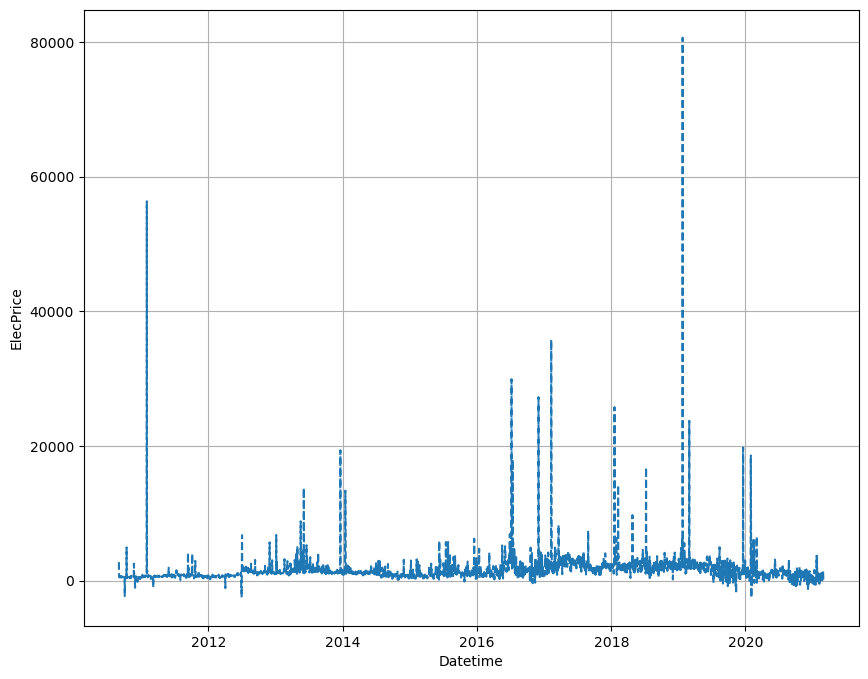

In [8]:
#Plot of the daily ElecPrice over time
plt.figure(figsize=(10,8))
plt.plot(daily_df.index, daily_df.y, '--')
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('ElecPrice')

# Question 12

In [9]:
#Importing the adf library
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

sysload_adf = adfuller(daily_df['SysLoad'])
gasprice_adf = adfuller(daily_df['GasPrice'])
print(f'p-value of the SysLoad: {round(sysload_adf[1],6)}')
print(f'p-value of the GasPrice: {round(gasprice_adf[1],6)}')

p-value of the SysLoad: 0.004254
p-value of the GasPrice: 0.045027


# Question 13

In [10]:
# GasPrice crtical values
gasprice_adf = adfuller(daily_df['GasPrice'])
print(f'ADF Statistic: {round(gasprice_adf[0],4)}')
print('Critical Values:')
for k, v in gasprice_adf[4].items():
  print(f'   {k}: {v}')

ADF Statistic: -2.9028
Critical Values:
   1%: -3.4320693157877544
   5%: -2.8622996992165364
   10%: -2.5671743978048323


In [11]:
# ElecPrice critical values
elecprice_adf = adfuller(daily_df['y'])
print(f'ADF Statistic: {round(elecprice_adf[0],4)}')
print('Critical Values:')

for k, v in elecprice_adf[4].items():
 print(f'{k} : {v}') 

ADF Statistic: -8.2691
Critical Values:
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


In [12]:
# Spliting of the datsets into train and test

In [13]:
daily_df.reset_index(inplace=True)

In [14]:
#Split the dataset
train = daily_df.iloc[:2757,:]
test = daily_df.iloc[2757:,:]

In [15]:
# Defining the MAPE function
def mape(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.mean(np.abs((y - yhat)/y)*100),2)

In [34]:
import prophet
from prophet import Prophet
# fit train data to fb prophet model
model_1 = Prophet()
model_1.fit(train)

21:52:04 - cmdstanpy - INFO - Chain [1] start processing
21:52:05 - cmdstanpy - INFO - Chain [1] done processing


# Question 14

In [35]:
pred1 = model_1.predict(test) 
mape(test['y'],pred1['yhat'])

547.58

# Question 15

In [36]:
# Defining the RMSE function
def rmse(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.sqrt(np.mean(np.square(y - yhat))),2)

In [37]:
rmse(test['y'], pred1['yhat'])

3214.12

# Question 16

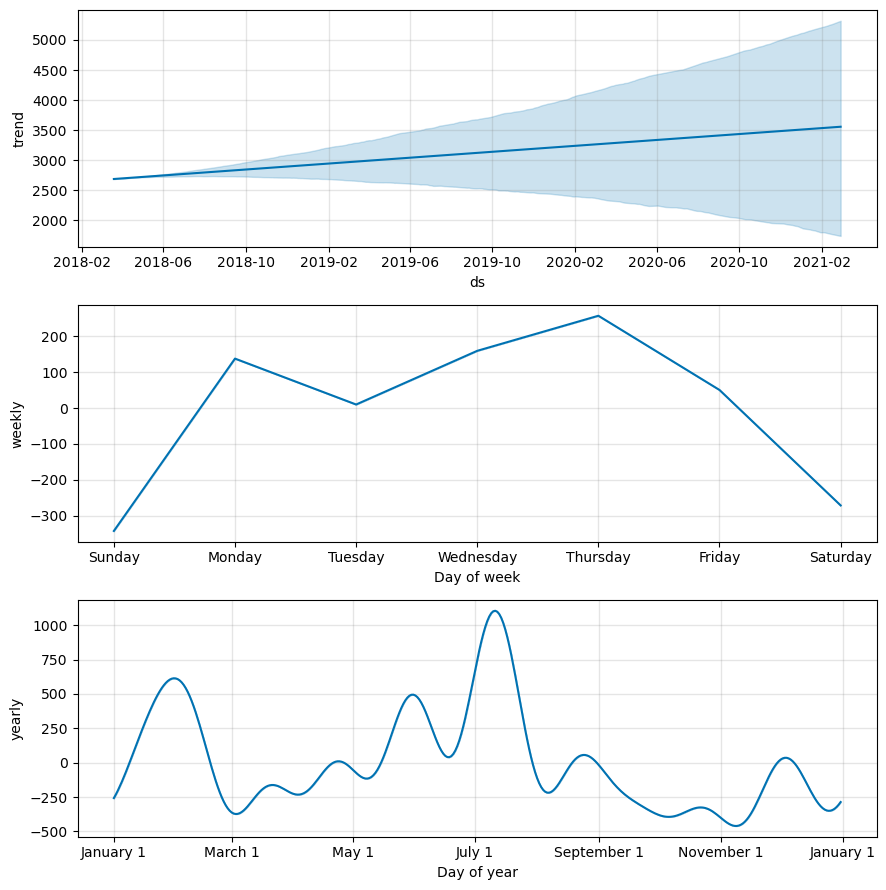

In [38]:
model_1.plot_components(pred1) 
plt.show()

In [40]:
#to [‘add1’, ‘add2’, ‘add3’’] respectively, as the regressors

#Rename "SysLoad", "Tmax", and "GasPrice" to "add1", "add2", and "add3" respectively
new_df = daily_df.rename(columns={"SysLoad" : "add1" , "Tmax" : "add2", "GasPrice" : "add3" })
new_df.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [41]:
# assign train and test data
train2 = new_df[:2757]
test2 = new_df[2757:]
print('train shape', train2.shape)
print('test shape', test2.shape)

train shape (2757, 5)
test shape (1077, 5)


In [ ]:
#Create multivariate model
model2 = Prophet()

model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [ ]:
model2.fit(train2)

# Question 17

In [ ]:
#Evaluate MAPE on the test set
pred2 = model2.predict(test2) 
mape(test['y'],pred2['yhat'])

# Question 18

In [ ]:
#RMSE on test set
rmse(test2['y'],pred2['yhat'])

# Question 19

In [ ]:
model2.plot_components(pred2) 
plt.show()

In [ ]:
# Split the dataset
train3 = new_df.iloc[:2757,:]
test3 = new_df.iloc[2757:,:]
train3.shape , test3.shape

In [ ]:
#Training a forecast model without 'Tmax' 
model_3 = Prophet()
model_3.add_regressor('add1')
model_3.add_regressor('add3')

In [ ]:
model_3.fit(train3)

# Question 20

In [ ]:
pred3 = model_3.predict(test3) 
mape(test3['y'],pred3['yhat'])

In [ ]:
model_3.plot_components(pred3)